In [1]:
import tensorflow as tf

## Defining layers in Tensorflow

`tensorflow.keras.layers` contains many layers that you could use for your assignment. 
For convolution, use:

`tensorflow.keras.layers.Conv2D`

> `tf.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', **kwargs)`

The only thing

In [9]:
# Example 
input_shape = (4, 28, 28, 3)
# 4 images of dimension 28 x 28 having three color channels 

x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', padding="VALID", input_shape=input_shape[1:])(x)
y.numpy().shape

(4, 26, 26, 2)

## How Convolutional Layers Work
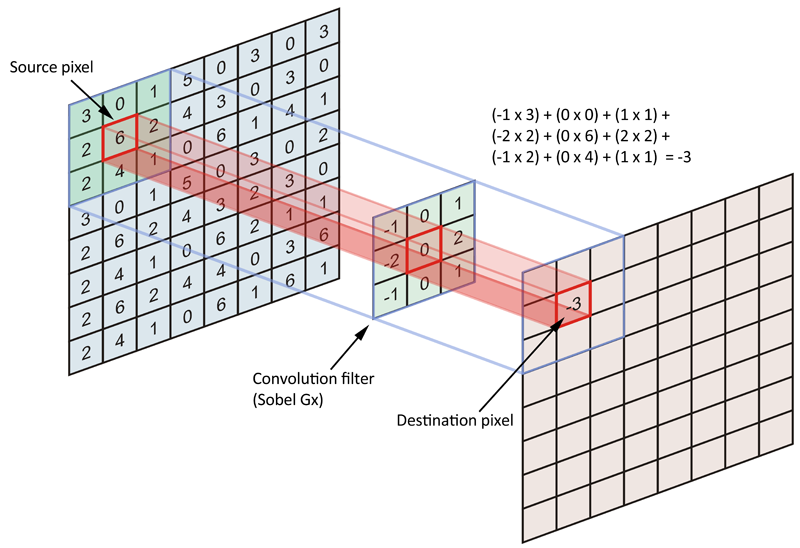

The figures above shows a graphical visualization of convolution layer of dimension `3x3x1`. (3x3: height and width of the filter, 1: number of filters)

## Strides and Window Size

Stride describes the number of steps the filter slides both horizontally and vertically after performing the convolution operation at (p, q). 

Suppose stride=(2,2). Then after performing convolution operation at (p, q), the filter moves to (p+2, q+2)

## Relationship between Input Dimension, Output Dimension, Filter Size and Stride

`Output_Height = (Input_Height + 2 * Padding - Filter_Height + Stride) / Stride`

`     26       = (     28      + 2 *    0    -       3       +    1 )  /    1  `

In [ ]:
# If padding is set to "SAME", then the input height and weight becomes the same.

In [16]:
# Example 
input_shape = (4, 28, 28, 2)
# 4 images of dimension 28 x 28 having three color channels 

x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', padding="SAME")(x)
y.numpy().shape

(4, 28, 28, 2)

## Cascading Multiple Layers

We can cascade multiple convolution layers (Along with Pooling Layers) together to form a model.

## Pooling Layer

Primarily used to reduce dimension of the input, while keeping the number of channels constant.

In [21]:
x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.], 
                 [13. ,14., 15., 16.]])
x = tf.reshape(x, [1, 4, 4, 1])

max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME')

# The same formula for output height applies for Pooling layers, given the 
# input height, padding and stride. But when padding = "SAME", the output layer
# becomes 

# output_height = input_height / pool_size

y = max_pool_2d(x)
y.numpy().shape

(1, 2, 2, 1)

## Creating a Model.

The simplest convolution layer is composed of
- Conv2D layers
- Pooling layers (to reduce the dimensions)
- Fully Connected layer

In [30]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

def create_model():
    image = Input(shape=(32,32,3))
    
    x = Conv2D(24, kernel_size=(8,8), padding="SAME", activation='tanh', name='conv_1')(image)
    # (32, 32, 24)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME')(x)
    # (16, 16, 24)
    x = Conv2D(12, kernel_size=(8,8), padding="SAME", activation='tanh', name='conv_2')(x)
    # (16, 16, 12)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME')(x)
    # (8, 8, 12)
    x = Conv2D(6, kernel_size=(8,8), padding="SAME", activation='tanh', name='conv_3')(x)
    # (8, 8, 6)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME')(x)
    # (4, 4, 6)
    flatten = Flatten(name='flatten')(x)
    # (4 * 4 * 6)
    output = Dense(10, activation='softmax', name='output')(flatten)
    model = Model(image, output)
    return model

model = create_model()
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 24)        4632      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 24)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 12)        18444     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 12)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 6)           4614      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 6)          

## Training the model

In [31]:
import numpy as np
# Load the (preprocessed) CIFAR10 data.

data = tf.keras.datasets.cifar10.load_data()

x_train = data[0][0].astype(np.float32)
y_train = data[0][1]

x_test = data[1][0].astype(np.float32)
y_test = data[1][1]


# shuffle the training data
perm = np.arange(x_train.shape[0])
np.random.shuffle(perm)
x_train = x_train[perm]
y_train = y_train[perm]


# Use one-hot representation of the label
y_train = tf.one_hot(np.squeeze(y_train), 10)
y_test = tf.one_hot(np.squeeze(y_test), 10)

num_train = 100
x_train = x_train[:num_train]
y_train = y_train[:num_train]

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

trace = model.fit(x=x_train, y=y_train, batch_size=16, epochs=100, verbose=1, 
                  validation_split=0.1, shuffle=True)

Epoch 1/100
6/6 [==============================] - 0s 51ms/step - loss: 2.3105 - categorical_accuracy: 0.0444 - val_loss: 2.3043 - val_categorical_accuracy: 0.2000
Epoch 2/100
6/6 [==============================] - 0s 31ms/step - loss: 2.3018 - categorical_accuracy: 0.1111 - val_loss: 2.3038 - val_categorical_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 33ms/step - loss: 2.2938 - categorical_accuracy: 0.1111 - val_loss: 2.2963 - val_categorical_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 31ms/step - loss: 2.2886 - categorical_accuracy: 0.1778 - val_loss: 2.2733 - val_categorical_accuracy: 0.1000
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 2.2782 - categorical_accuracy: 0.1778 - val_loss: 2.2696 - val_categorical_accuracy: 0.2000
Epoch 6/100
6/6 [==============================] - 0s 32ms/step - loss: 2.2687 - categorical_accuracy: 0.1778 - val_loss: 2.2453 - val_categorical_accuracy: 0.1000
Epoch 7/

Epoch 51/100
6/6 [==============================] - 0s 32ms/step - loss: 1.8148 - categorical_accuracy: 0.7111 - val_loss: 2.0912 - val_categorical_accuracy: 0.3000
Epoch 52/100
6/6 [==============================] - 0s 41ms/step - loss: 1.7935 - categorical_accuracy: 0.7111 - val_loss: 2.0883 - val_categorical_accuracy: 0.4000
Epoch 53/100
6/6 [==============================] - 0s 30ms/step - loss: 1.7857 - categorical_accuracy: 0.7222 - val_loss: 2.1252 - val_categorical_accuracy: 0.3000
Epoch 54/100
6/6 [==============================] - 0s 39ms/step - loss: 1.7865 - categorical_accuracy: 0.7333 - val_loss: 2.1037 - val_categorical_accuracy: 0.4000
Epoch 55/100
6/6 [==============================] - 0s 37ms/step - loss: 1.7741 - categorical_accuracy: 0.7333 - val_loss: 2.1461 - val_categorical_accuracy: 0.2000
Epoch 56/100
6/6 [==============================] - 0s 35ms/step - loss: 1.7595 - categorical_accuracy: 0.7556 - val_loss: 2.1329 - val_categorical_accuracy: 0.3000
Epoch 57/1

## Creating your own layer

In [39]:
class Res(tf.keras.Model):
    def __init__(self, n_channels):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(n_channels, padding='same', kernel_size=3)
        self.conv2 = tf.keras.layers.Conv2D(3, kernel_size=3, padding='same')
    def call(self, X):
        out = self.conv1(X)
        out = tf.keras.activations.tanh(out)
        out = self.conv2(out)
        out = out + X
        out = tf.keras.activations.tanh(out)
        return out


model = tf.keras.Sequential([
        Res(16),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'),
        Res(12),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'),
        tf.keras.layers.GlobalAvgPool2D(), # can also be tf.keras.layers.Flatten
        tf.keras.layers.Dense(10, activation="softmax")])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


trace = model.fit(x=x_train, y=y_train, batch_size=16, epochs=100, verbose=1, 
                  validation_split=0.1, shuffle=True)

Epoch 1/100
6/6 [==============================] - 0s 35ms/step - loss: 2.3016 - categorical_accuracy: 0.1111 - val_loss: 2.2995 - val_categorical_accuracy: 0.1000
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 2.3011 - categorical_accuracy: 0.1111 - val_loss: 2.2991 - val_categorical_accuracy: 0.1000
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 2.3009 - categorical_accuracy: 0.1111 - val_loss: 2.2986 - val_categorical_accuracy: 0.1000
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 2.3008 - categorical_accuracy: 0.1111 - val_loss: 2.2981 - val_categorical_accuracy: 0.1000
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 2.3005 - categorical_accuracy: 0.1111 - val_loss: 2.2977 - val_categorical_accuracy: 0.1000
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 2.3006 - categorical_accuracy: 0.1111 - val_loss: 2.2975 - val_categorical_accuracy: 0.1000
Epoch 7/100
6/6 

Epoch 51/100
6/6 [==============================] - 0s 20ms/step - loss: 2.2946 - categorical_accuracy: 0.1222 - val_loss: 2.2964 - val_categorical_accuracy: 0.1000
Epoch 52/100
6/6 [==============================] - 0s 23ms/step - loss: 2.2945 - categorical_accuracy: 0.1222 - val_loss: 2.2968 - val_categorical_accuracy: 0.1000
Epoch 53/100
6/6 [==============================] - 0s 14ms/step - loss: 2.2943 - categorical_accuracy: 0.1222 - val_loss: 2.2972 - val_categorical_accuracy: 0.1000
Epoch 54/100
6/6 [==============================] - 0s 16ms/step - loss: 2.2941 - categorical_accuracy: 0.1222 - val_loss: 2.2971 - val_categorical_accuracy: 0.1000
Epoch 55/100
6/6 [==============================] - 0s 19ms/step - loss: 2.2943 - categorical_accuracy: 0.1333 - val_loss: 2.2964 - val_categorical_accuracy: 0.1000
Epoch 56/100
6/6 [==============================] - 0s 23ms/step - loss: 2.2939 - categorical_accuracy: 0.1333 - val_loss: 2.2968 - val_categorical_accuracy: 0.1000
Epoch 57/1

6/6 [==============================] - 0s 17ms/step - loss: 2.2878 - categorical_accuracy: 0.1778 - val_loss: 2.2965 - val_categorical_accuracy: 0.0000e+00


In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
res_13 (Res)                 (None, 32, 32, 3)         883       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 3)         0         
_________________________________________________________________
res_14 (Res)                 (None, 16, 16, 3)         663       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 8, 8, 3)           0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                40        
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
____________________________________________________

## Adding BatchNormalization and Dropout

Batch Normalization and Dropout layers are popular measures used to avoid overfitting.

Batch Normalization: takes two trainable parameters $\alpha$ (scaling), and $\gamma$ (shifting)

>`tf.keras.layers.BatchNormalization()`

Dropout: No trainable parameter, but takes a dropout parameter

> `tf.keras.Dropout(0.2)`